# Reading data from the B-Field Sensor of a Smartphone

## Summary

The smartphnone app "phyphox" (avalibale for iOS and Andriod) is used to record B-Field data from the smartphone and export it into a csv-file. The data are collaected on a merry-go-round on a playground in Geneva.

A Jupyter Notebook in Python demonstratea, how to import, display, and analyze these data.

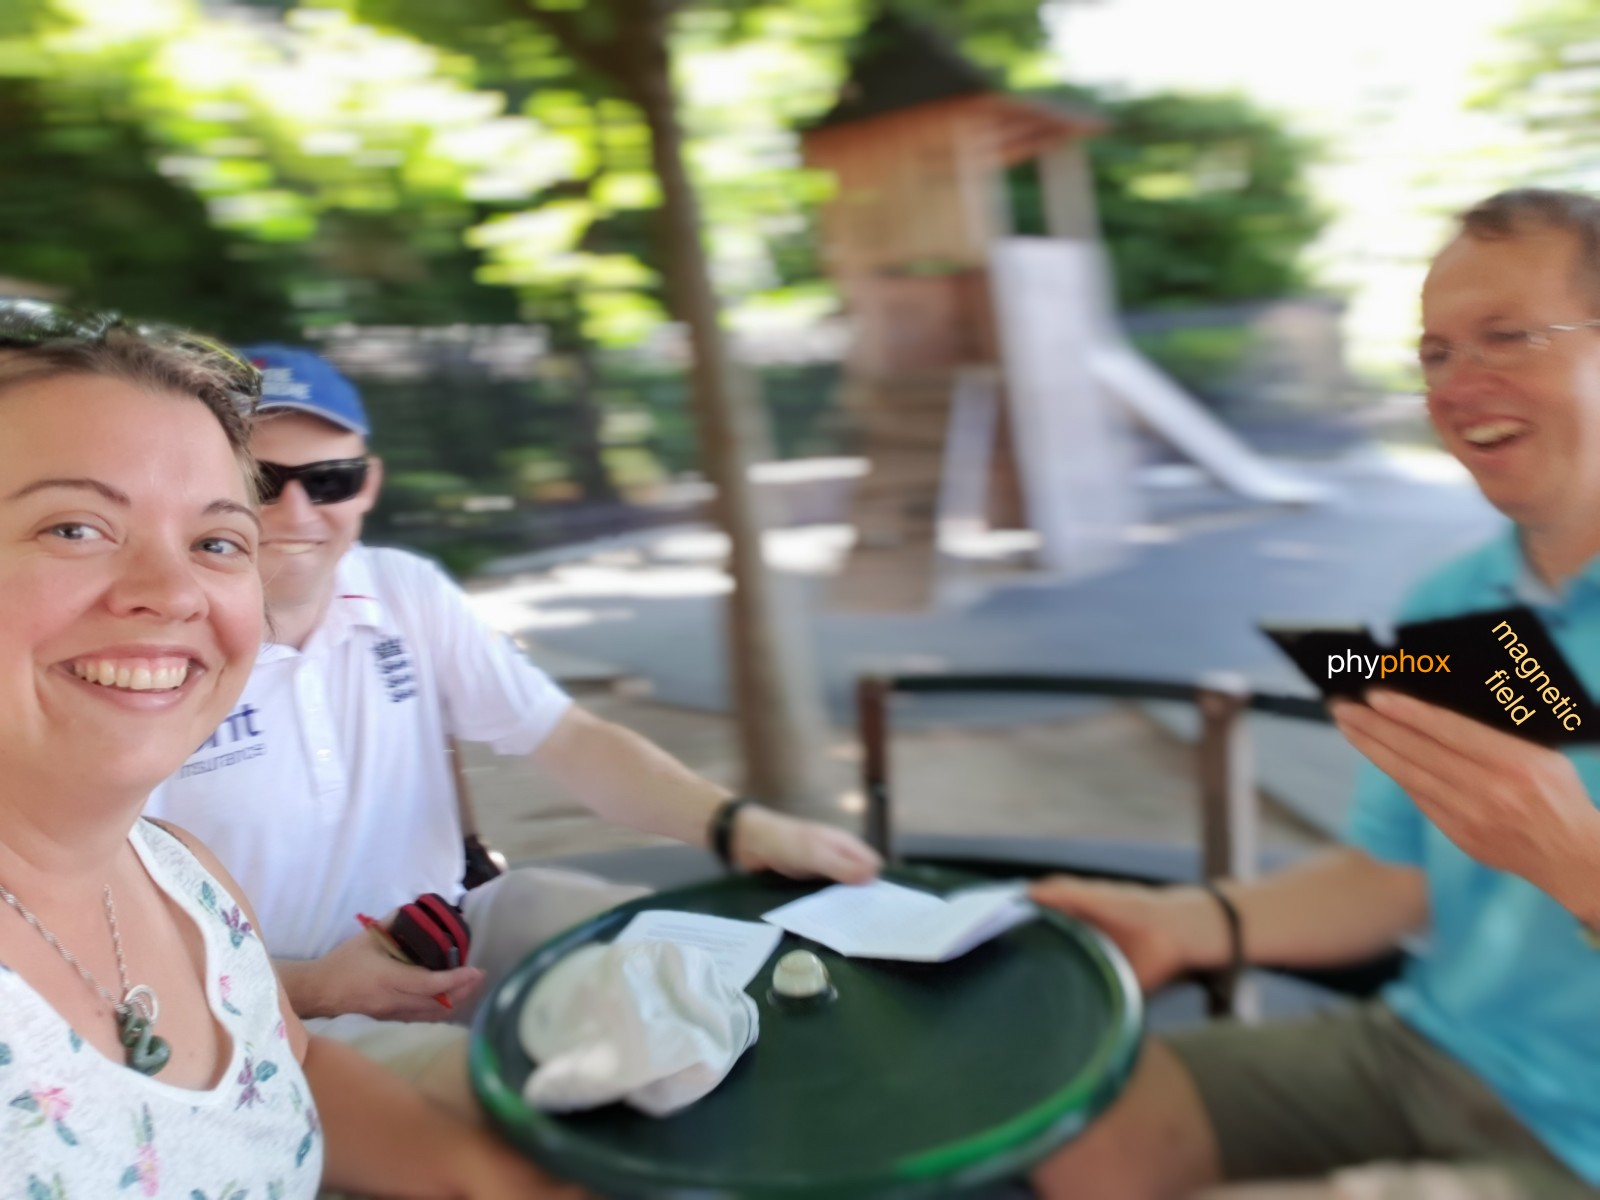

## 1. Record data with phyphox on smartphone

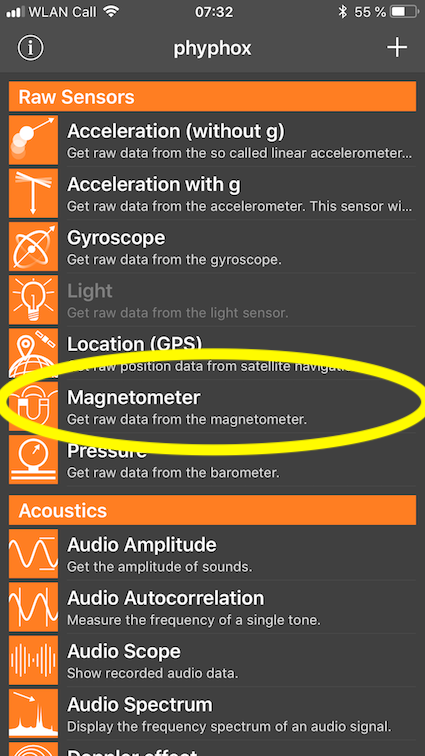
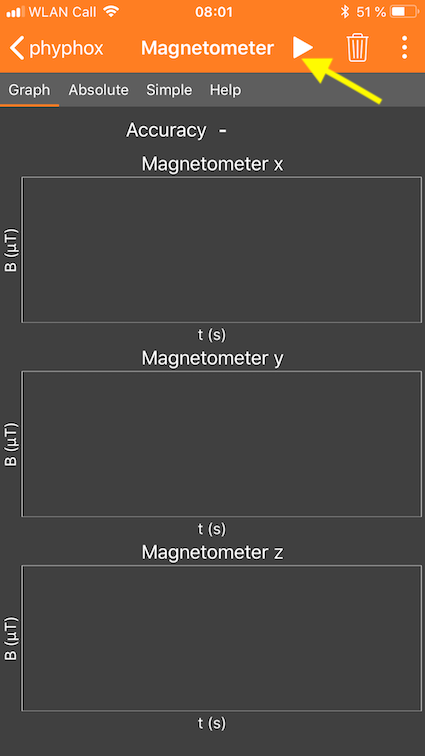
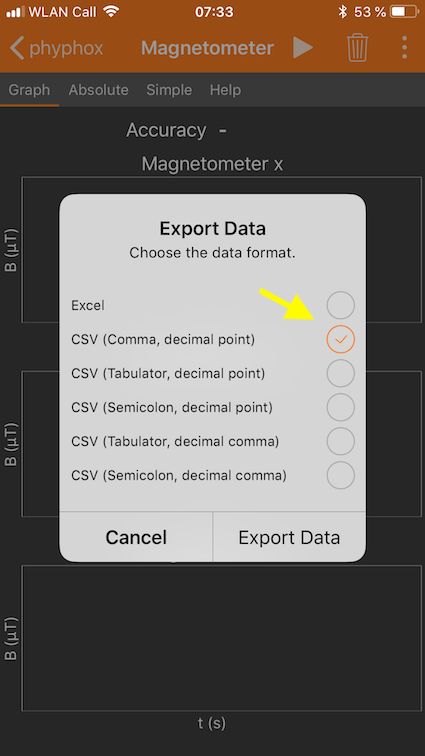

## 2. Read data from csv-file

This code is needed to load some software packages that we will need to use later. 

In [ ]:
import pandas as pd 
# pandas is for data structures and data analysis tools
import numpy as np
# numpy is for scientific computing
import matplotlib.pyplot as plt
# matplotlib is for plotting
%matplotlib inline

First we import the data from the csv-file and print the first rows of the imported table to get an overview. It is also usefull to know the lentght of the imported dataset. The export option we used in phyphox was "CSV (Comma, decimal point).

In [ ]:
# we use read_csv function from pandas to read the data into a "data frame"
data = pd.read_csv('data/phyphox_B.csv')

In [ ]:
# print the first 5 rows of the table
data.head()

In [ ]:
len(data)

## 3. Display data

The coordinate system of the smartphone is shown below.

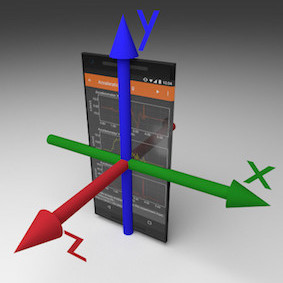

We can put the interesting columns of the dataset into variables and draw 3 graphs for the x, y, and z-component of the magnetic field B versus time in one single plot. 

As you notice at the beginning and at the end of the dataset there are some deviations. But in the middle the x and y-compoents follow a sinus-curve. The z-component is almost constant.

In [ ]:
# put relevant data into vectors
t=data['Time (s)']
mf_x=data['Magnetic Field x (µT)']
mf_y=data['Magnetic Field y (µT)']
mf_z=data['Magnetic Field z (µT)']

In [ ]:
# plot the x, y and z values of B versus t
fig, mf = plt.subplots(figsize=(8,6))
plt.title('magnetic field on merry-go-round \n', fontsize=15)
plt.xlabel('t/s', fontsize=15)
plt.ylabel('Megnetic Field in µT', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(t,mf_x, color="black")
plt.plot(t,mf_y, color="red")
plt.plot(t,mf_z, color="blue")
legend = mf.legend(('B_x', 'B_y', 'B_z'),loc='upper right',fontsize=15)
plt.axhline(y=0, color='black', linestyle='-')
plt.axis([0, 30, -50,50])
plt.grid(True)
plt.show()


## 4. Analyze Data

Now we cut out the interesting part from the dataset and plot agein. It would be interesting to determine the frequency of the merry-go-round. It is easy to read it  from the plot. But for calculating you have to fit a function to the data.

For this we try a least-square estimation of a trigonometric function with 4 parameters. 

$$y(x) = a + b \cdot \sin (c \cdot x + d)$$

Please note that the results for the parameters for perodic functions are strngly dependend from the initial condition. So you have to make a good initial guess for the paramters for the fit.

In [ ]:
# rename the columns
data=data.rename(index=str, columns={"Time (s)":"t","Magnetic Field x (µT)":
                                     "B_x", "Magnetic Field y (µT)": "B_y", 
                                     "Magnetic Field z (µT)":"B_z", "Absolute field (µT)":"B"})

In [ ]:
# get only the smooth part of the data between 6,5 an 20 s
part = data[(data.t >= 6.5) & (data.t <= 20)]

In [ ]:
part.head()

In [ ]:
# put this part into vectors
p_t=part['t']
p_bx=part['B_x']
p_by=part['B_y']
p_bz=part['B_z']

In [ ]:
# plot
fig, p = plt.subplots(figsize=(8,6))
plt.title('merry-go-round - magnetic field vs. time \n', fontsize=15)
plt.xlabel('t/s', fontsize=15)
plt.ylabel('Megnetic Field in µT', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.axhline(y=0, color='black', linestyle='-')
plt.plot(p_t,p_bx, color="black")
plt.plot(p_t,p_by, color="red")
plt.plot(p_t,p_bz, color="blue")
legend = p.legend(loc='upper right',fontsize=15)
plt.axis([6.5, 20, -40,50])
plt.grid(True)
plt.show()

In [ ]:
from math import exp, expm1, sin, cos, pi
from scipy.optimize import curve_fit
# we need this for fitting

In [ ]:
# the function we want to use fitting
def func(x, a, b, c, d):
    return a + b * np.sin(c * x + d)

In [ ]:
# fitting the B_x-data 
popt, pcov = curve_fit(func, p_t, p_bx,[0,20,2,2],method='lm')
popt
# plot the result
fig, fit= plt.subplots(figsize=(8,6))
plt.plot(p_t, func(p_t, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(p_t,p_bx)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('t')
plt.ylabel('B_x in µT')
plt.axhline(y=0, color='black', linestyle='-')
plt.legend(loc='upper center')
plt.title('fitting results - magnetic field B_x vs. time \n', fontsize=15)
plt.axis([6.5, 20, -30,30])
plt.show()

In [ ]:
# we can deternine the frequency of the rotation from parameter c
print('frequency in Hz:',popt[2]/2/pi, '\nperiod in s', 2*pi/popt[2])

The calculated frequency is in agreement with the period of oscillation from the plot.

